# Matplotlib

In [ ]:
from matplotlib import style
style.use("ggplot")

##### Gráficos básicos

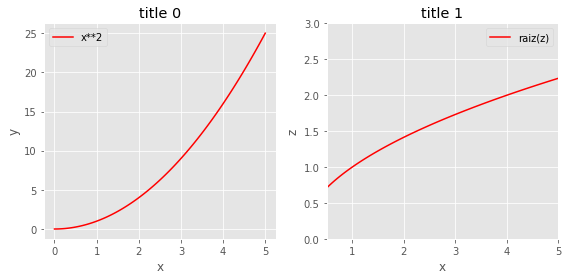

In [ ]:
import numpy as np
x = np.linspace(0,5,100)
y = x**2
z = np.sqrt(x)

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

axes[0].plot(x, y, 'r', label="x**2")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('title 0')

axes[1].plot(x, z, 'r', label="raiz(z)")
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')
axes[1].set_ylim([0, 3])
axes[1].set_xlim([0.5, 5])
axes[1].set_title('title 1')

# fig    
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show();

##### Gráficos de Contorno

Colormaps e figuras de contorno são úteis para traçar funções de duas variáveis. Na maioria dessas funções, usaremos um mapa de cores para codificar uma dimensão dos dados. Existem vários mapas de cores predefinidos. É relativamente simples definir mapas de cores personalizados. Para uma lista de mapas de cores predefinidos, consulte: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [ ]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2 * phi_p)

In [ ]:
phi_m = np.linspace(0, 2 * np.pi, 100)
phi_p = np.linspace(0, 2 * np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

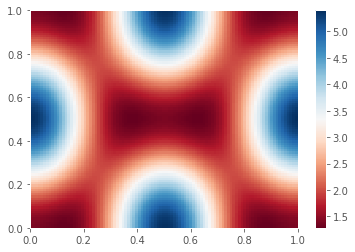

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2 * np.pi), Z, 
              cmap = plt.cm.RdBu, 
              vmin = abs(Z).min(), 
              vmax = abs(Z).max())
cb = fig.colorbar(p, ax = ax)

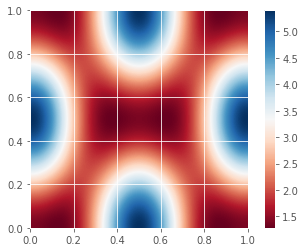

In [ ]:
fig, ax = plt.subplots()

im = ax.imshow(Z, 
               cmap = plt.cm.RdBu, 
               vmin = abs(Z).min(), 
               vmax = abs(Z).max(), 
               extent = [0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax = ax)

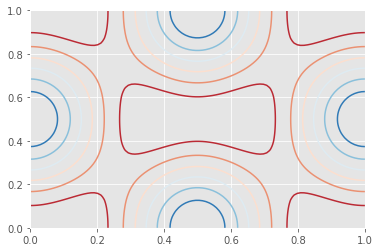

In [ ]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, 
                 cmap = plt.cm.RdBu, 
                 vmin = abs(Z).min(), 
                 vmax = abs(Z).max(), 
                 extent = [0, 1, 0, 1])

##### Gráficos em 3D

Para usar gráficos 3D no matplotlib, primeiro precisamos criar uma instância da classe `Axes3D`. Os eixos 3D podem ser adicionados a uma tela de figura matplotlib exatamente da mesma maneira que os eixos 2D; ou, mais convenientemente, passando um argumento de palavra-chave `'projection =' 3d'` para os métodos `add_axes` ou `add_subplot`.

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

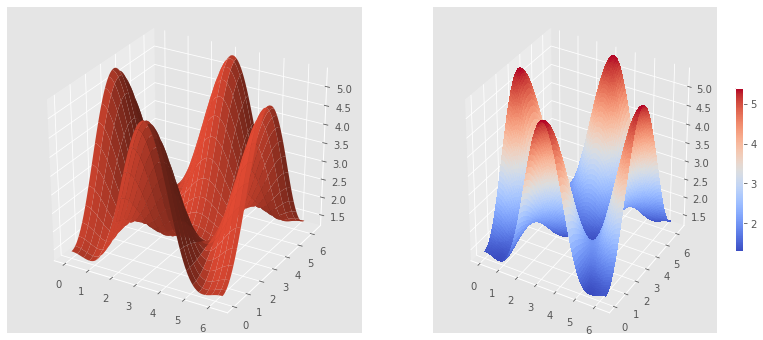

In [ ]:
fig = plt.figure(figsize = (14,6))

# `ax` é uma instância de eixo sensível a 3D devido ao argumento de palavra-chave projection = '3d' para add_subplot
ax = fig.add_subplot(1, 2, 1, projection = '3d')

p = ax.plot_surface(X, Y, Z, 
                    rstride = 4, 
                    cstride = 4, 
                    linewidth = 0)

# surface_plot com gradação de cores e barra de cores
ax = fig.add_subplot(1, 2, 2, projection = '3d')
p = ax.plot_surface(X, Y, Z, 
                    rstride = 1, 
                    cstride = 1, 
                    cmap = plt.cm.coolwarm, 
                    linewidth = 0, 
                    antialiased = False)
cb = fig.colorbar(p, shrink = 0.5)

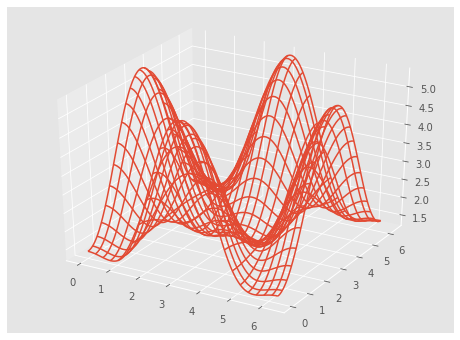

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection = '3d')

p = ax.plot_wireframe(X, Y, Z, 
                      rstride = 4, 
                      cstride = 4)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


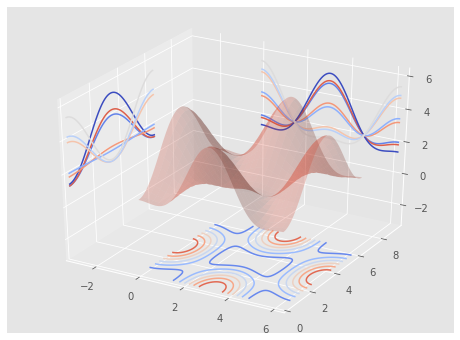

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride = 4, cstride = 4, alpha = 0.25)
cset = ax.contour(X, Y, Z, zdir = 'z', offset = -np.pi, cmap = plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir = 'x', offset = -np.pi, cmap = plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir = 'y', offset = 3 * np.pi, cmap = plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2 * np.pi);
ax.set_ylim3d(0, 3 * np.pi);
ax.set_zlim3d(-np.pi, 2 * np.pi);

# Séries Temporais

**datetime index**

In [7]:
from datetime import datetime

# Para entender a ordem dos argumentos
my_year = 2017; my_month = 1; my_day = 2
my_hour = 13; my_minute = 30; my_second = 15

# 2 de Janeiro de 2017 às 13:30:15
datetime(my_year,my_month, my_day, my_hour, my_minute, my_second)

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [8]:
# Criar um datetime list / array exemplo 
first_two = [datetime(2016, 1, 1), datetime(2016, 1, 2)]

# Convertendo para um index
dt_ind = pd.DatetimeIndex(first_two); dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

**Fonte de Dados Econômicos e Financeiros**: Quandl: https://www.quandl.com/tools/python, https://www.quandl.com/search 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install quandl
import quandl

In [13]:
# Preço do WTI Crude Oil, Dept.Energia EUA, Ações do Facebook
# quandl.ApiConfig.api_key = "2qM_u-g8oxTV6JbhUWLn"
quandl.ApiConfig.api_key = "F4vv8WxVmrSiAiYybBUJ"
crudeoil = quandl.get("EIA/PET_RWTC_D")
facebook = quandl.get("WIKI/FB")

In [14]:
crudeoil.index 

DatetimeIndex(['1986-01-02', '1986-01-03', '1986-01-06', '1986-01-07',
               '1986-01-08', '1986-01-09', '1986-01-10', '1986-01-13',
               '1986-01-14', '1986-01-15',
               ...
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
               '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08'],
              dtype='datetime64[ns]', name='Date', length=9059, freq=None)

In [15]:
# Posição da última data, última data, posição da primeira data, primeira data
crudeoil.index.argmax(), crudeoil.index.max(), crudeoil.index.argmin(), crudeoil.index.min()

(9058, Timestamp('2021-11-08 00:00:00'), 0, Timestamp('1986-01-02 00:00:00'))

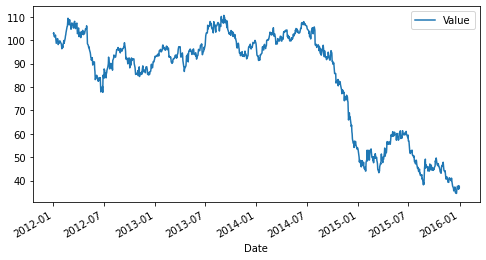

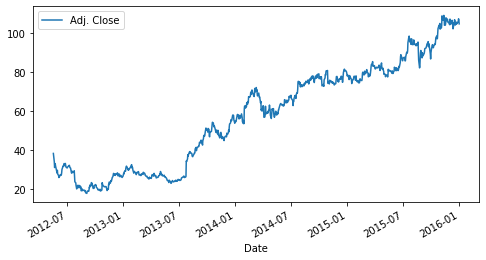

In [16]:
from datetime import datetime
inicio = datetime(2012,1,1)
fim = datetime(2015,12,31)

filtrooil = np.logical_and(crudeoil.index.to_pydatetime() >= inicio,crudeoil.index.to_pydatetime() <= fim) 
filtroface = np.logical_and(facebook.index.to_pydatetime() >= inicio,facebook.index.to_pydatetime() <= fim)
crudeoil[filtrooil].plot(figsize = (8, 4))
facebook[filtroface].plot(y='Adj. Close', figsize = (8,4));

**Especificação de Dados e Datas**

In [17]:
mydata = quandl.get(["FRED/GDP", "NSE/OIL.1", "WIKI/AAPL.4"],
                    start_date = "2001-12-31", 
                    end_date = "2005-12-31")
mydata.head()

,FRED/GDP - Value,NSE/OIL - Open,WIKI/AAPL - Close
Date,,,
2001-12-31,NaN,NaN,21.90
2002-01-01,10783.5,NaN,NaN
2002-01-02,NaN,NaN,23.30
2002-01-03,NaN,NaN,23.58
2002-01-04,NaN,NaN,23.69


**Visualização de dados em Séries Temporais**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

site = "https://raw.githubusercontent.com/"
diretorio = "gustavomirapalheta/classes_datasets/master/"
arquivo = "ibm.csv"
link = site + diretorio + arquivo
df = pd.read_csv(link, sep=';', decimal=',', index_col = 'Data', parse_dates = True)
df.head()

,Retorno,Volume
Data,,
1962-03-01,0.008741,292500
1962-04-01,0.009966,262500
1962-05-01,0.019693,367500
1962-08-01,0.018750,547500
1962-09-01,0.011828,495000


In [30]:
df = quandl.get("WIKI/IBM")
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

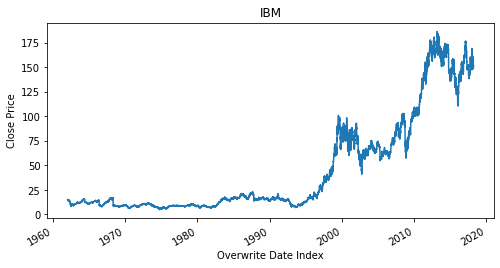

In [31]:
df['Adj. Close'].plot(figsize = (8, 4), title = 'IBM',
                         ylabel = 'Close Price', xlabel = 'Overwrite Date Index');

**Deslocamento Temporal (Time Shifting)**

In [29]:
df.shift(1).head(3).iloc[:,0:5]

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN
1962-01-03,578.5,578.5,572.0,572.0,19360.0
1962-01-04,572.0,577.0,572.0,577.0,14400.0


In [28]:
df.shift(-1).head(3).iloc[:,0:5]

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,572.0,577.0,572.0,577.00,14400.0
1962-01-03,577.0,577.0,571.0,571.25,12800.0
1962-01-04,570.5,570.5,559.0,560.00,18160.0


Strings de deslocamento de séries temporais

1.   **B**	business day frequency, //   **C**	custom business day frequency (experimental)
3.   **D**	calendar day frequency //    **W**	weekly frequency
5.   **M**	month end frequency //   **SM**	semi-month end frequency (15th and end of month)
6.   **BM**	business month end frequency // **CBM**	custom business month end frequency
9.   **MS**	month start frequency // **SMS**	semi-month start frequency (1st and 15th)
11.  **BMS**	business month start frequency // **CBMS**	custom business month start frequency
13.  **Q**	quarter end frequency // **BQ**	business quarter endfrequency
15.  **QS**	quarter start frequency // **BQS**	business quarter start frequency
17.  **A**	year end frequency // **BA**	business year end frequency
19.  **AS**	year start frequency // **BAS**	business year start frequency // **BH**	business hour frequency
20.  **H**	hourly frequency // **T** min	minutely frequency // **S**	secondly frequency
25.  **L** ms	milliseconds // **U** us	microseconds // **N**	nanoseconds

In [27]:
# Médias Anuais. Faça a amostragem pelo último dia do ano e peça a média anual.
df.resample(rule = 'A').mean().head().iloc[:,0:5]

,Open,High,Low,Close,Volume
Date,,,,,
1962-12-31,433.351111,437.760397,428.778333,432.373968,72929.841270
1963-12-31,448.485498,451.913307,446.276375,448.649920,38841.115538
1964-12-31,489.165455,492.186759,486.891383,488.968379,26539.446640
1965-12-31,480.829881,483.313611,478.662659,481.117619,20242.539683
1966-12-31,408.986587,412.069325,405.930556,408.998413,23096.825397


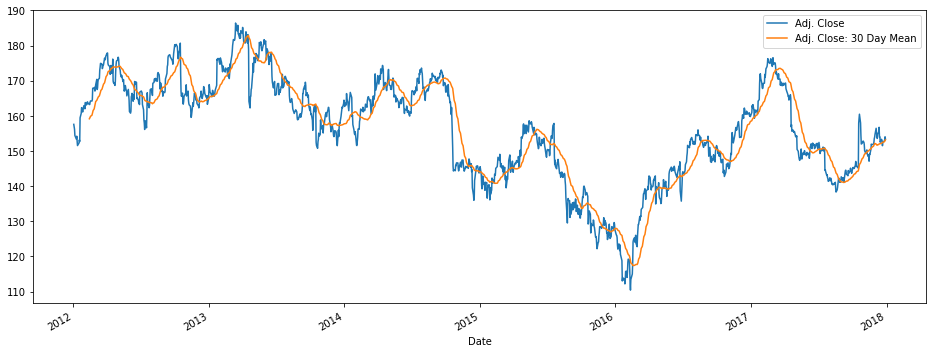

In [52]:
# Média móvel de 30 dias de 01/01/2012 até 31/12/2015
from datetime import datetime
inicio = datetime(2012,1,1); fim = datetime(2017,12,31)

import numpy as np
condicao1 = df.index >= inicio
condicao2 = df.index <= fim
filtro = np.logical_and(condicao1, condicao2)
df['Adj. Close: 30 Day Mean'] = df['Adj. Close'][filtro].rolling(window = 30).mean()
df.loc[filtro, ['Adj. Close','Adj. Close: 30 Day Mean']].plot(figsize=(16,6));

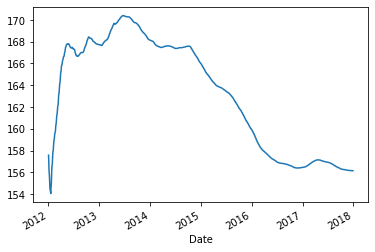

In [54]:
# Média cumulativa
df.loc[filtro, 'Adj. Close'].expanding(min_periods=1).mean().plot();

**Bandas de Bollinger**: São bandas de volatilidade formadas pela média móvel de 20 periodos do preço do ativo mais ou menos o desvio padrão deste preço neste mesmo periodo. Um ativo cujo preço esteja acima da sua banda superior estará "caro", bem como um ativo que esteja abaixo da banda inferior estará "barato". 

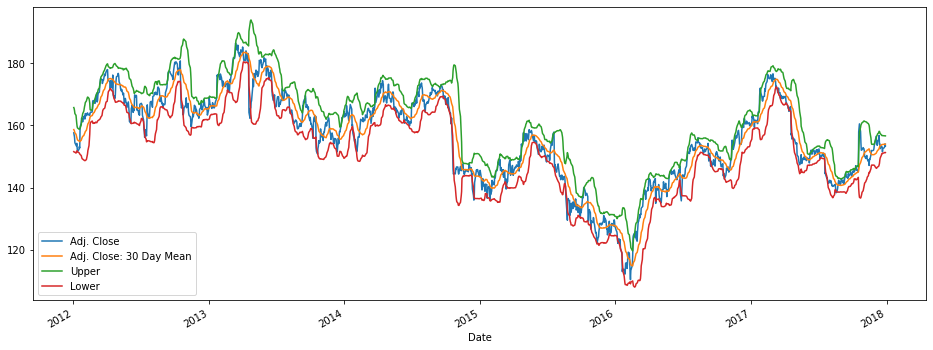

In [56]:
df['Adj. Close: 30 Day Mean'] = df['Adj. Close'].rolling(window=20).mean()
df['Upper'] = df['Adj. Close: 30 Day Mean'] + 2 * df['Adj. Close'].rolling(window = 20).std()
df['Lower'] = df['Adj. Close: 30 Day Mean'] - 2 * df['Adj. Close'].rolling(window = 20).std()
df.loc[filtro, ['Adj. Close','Adj. Close: 30 Day Mean','Upper','Lower']].plot(figsize = (16, 6));

# Exercício de AlgoTrade


Determinar o retorno proporcionado pela seguinte estratégia de compra e venda na ação da Walmart: quando o preço da ação estiver acima da banda de bollinger superior, 100% do valor disponível para a carteira deve ser vendido, quando o preço da ação estiver abaixo da banda de bollinger inferior, 100% do valor disponível para a carteira deve ser comprado. 

Cada banda de bollinger será formada pela distância da média móvel de 20 dias até duas vezes o desvio padrão contínuo de 20 dias para a mesma ação. 

A verificação desse evento de sinalização só deve acontecer uma vez por dia. O horizonte temporal de teste é o período que vai de 20/07/2014 até 20/07/2017.